In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns

# 2. Linear Regression Practice(Single Variable)

In [2]:
df= pd.read_csv('homeprices.csv')

In [3]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
df.shape

(5, 2)

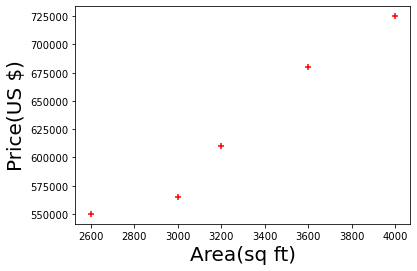

In [5]:
plt.scatter(df['area'], df['price'], color = 'red', marker = '+')
plt.xlabel('Area(sq ft)', fontsize = 20)
plt.ylabel('Price(US $)', fontsize = 20);

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(df[['area']],df.price)

LinearRegression()

In [8]:
lr.predict([[3300]])

array([628715.75342466])

In [9]:
lr.predict([[5000]])

array([859554.79452055])

In [10]:
lr.intercept_

180616.43835616432

In [11]:
lr.coef_

array([135.78767123])

In [12]:
# y = m*x + c
135.78767123*5000+180616.43835616432

859554.7945061643

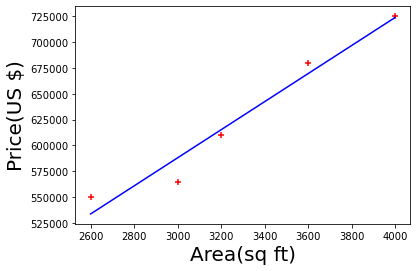

In [13]:
plt.scatter(df['area'], df['price'], color = 'red', marker = '+')
plt.xlabel('Area(sq ft)', fontsize = 20)
plt.ylabel('Price(US $)', fontsize = 20)
plt.plot(df['area'],lr.predict(df[['area']]), color = 'blue');

### Exercise - Linear Regression(Single Variable)

In [14]:
canada = pd.read_csv('canada_per_capita_income.csv')

In [15]:
canada.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [16]:
canada.shape

(47, 2)

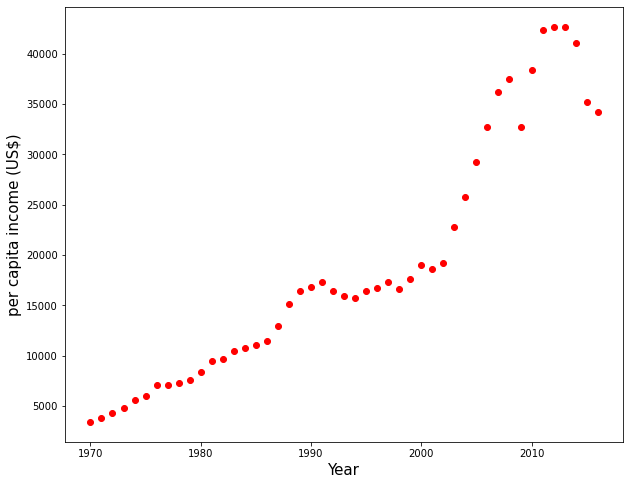

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(canada['year'], canada['per capita income (US$)'], color = 'red' )
plt.xlabel('Year', fontsize =15)
plt.ylabel('per capita income (US$)', fontsize = 15);

In [18]:
lr.fit(canada[['year']], canada['per capita income (US$)'])

LinearRegression()

In [19]:
lr.predict([[2020]])

array([41288.69409442])

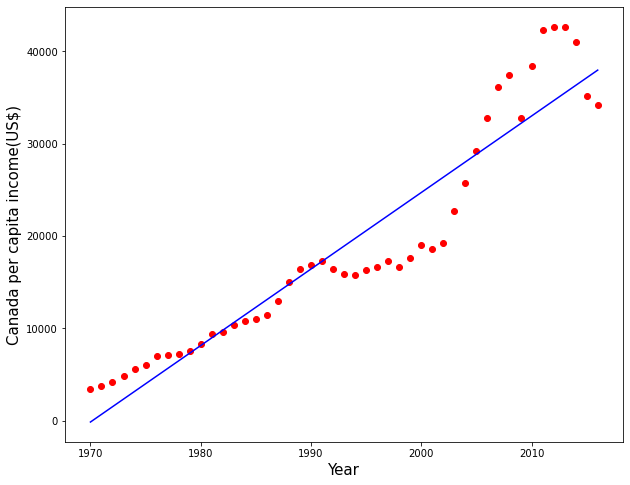

In [20]:
plt.figure(figsize = (10,8))
plt.scatter(canada['year'], canada['per capita income (US$)'],color = 'red')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Canada per capita income(US$)', fontsize = 15 )
plt.plot(canada['year'],lr.predict(canada[['year']]),color = 'blue')

### The predicted Canada's per capita income for year 2020 will be 41288.69409442 US($)

# 3. Linear Regression Multiple Variables

In [21]:
hpm =pd.read_csv('homepricesmulti.csv')

In [22]:
hpm.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [23]:
hpm.shape

(6, 4)

In [24]:
bedrooms_median = hpm.bedrooms.median()
bedrooms_median

4.0

In [25]:
 hpm['bedrooms'].fillna(bedrooms_median, inplace = True)

In [26]:
hpm.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [27]:
X = hpm.drop('price', axis = 1)
y = hpm['price']

In [28]:
lr.fit(X,y)

LinearRegression()

In [29]:
lr.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [30]:
lr.intercept_

221323.00186540425

In [31]:
lr.predict([[3000,3,40]])

array([498408.25158031])

In [32]:
112.06244194*3000+23388.88007794*3+-3231.71790863*40+221323.00186540425


498408.25157402427

In [33]:
lr.predict([[2500,4,5]])

array([578876.03748933])

##  Linear Regression Multiple Variables---Exercise

In [34]:
hiring = pd.read_csv('hiring.csv')

In [35]:
hiring.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [36]:
hiring.shape

(8, 4)

In [37]:
hiring['experience'].fillna('zero',inplace = True)

In [38]:
hiring.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


# 6. Using Dummy Variable method 

In [39]:
hpd = pd.read_csv('homepricesdummy.csv')

In [40]:
hpd.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [41]:
hpd.shape

(13, 3)

In [42]:
hpd['town'].value_counts()

monroe township    5
robinsville        4
west windsor       4
Name: town, dtype: int64

In [43]:
dummies = pd.get_dummies(hpd['town'])
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [44]:
merged = pd.concat([hpd, dummies], axis = 1)

In [45]:
merged.head(20)

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [46]:
merged.drop(['town','west windsor'], axis = 1, inplace = True)
merged.head(15)

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [47]:
X = merged.drop('price', axis =1)
y = merged['price']

In [48]:
lr.fit(X,y)

LinearRegression()

In [49]:
lr.predict([[2800,0,1]])

array([590775.63964739])

In [50]:
lr.predict([[3400,0,0]])

array([681241.66845839])

In [51]:
lr.score(X,y)

0.9573929037221873

# Using Label Encoder

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
hpdle = hpd

In [54]:
hpdle.head(15)

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [55]:
hpdle['town'] = le.fit_transform(hpdle['town'])

In [56]:
hpdle.head(15)

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [57]:
X = hpdle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [58]:
y = hpdle['price']
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

### Using OneHot Encoding

In [59]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [60]:
#X = ohe.fit_transform(X[['town']]).toarray()
#X

In [61]:
car= pd.read_csv('carprices.csv')

In [62]:
car.head(25)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [63]:
car['Car Model'] = le.fit_transform(car['Car Model'])

In [64]:
car.head(25)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [65]:
X = car.drop('Sell Price($)', axis = 1)
y = car['Sell Price($)']

In [66]:
X

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [67]:
lr.fit(X,y)

LinearRegression()

In [68]:
lr.predict([[2,45000,4]])

array([33336.7721827])

In [69]:
lr.predict([[1,86000,7]])

array([16106.74127344])

In [70]:
lr.score(X,y)

0.8719970367825952

## Using get dummies

In [71]:
cargd= pd.read_csv('carprices.csv')

In [72]:
cargd.head(15)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [73]:
dummies=pd.get_dummies(cargd['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [74]:
car_merged = pd.concat([cargd, dummies], axis=1)
car_merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [75]:
car_merged.drop(['Car Model', 'Mercedez Benz C class'], axis = 1, inplace = True)

In [76]:
car_merged.head(20)

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [77]:
X = car_merged.drop('Sell Price($)', axis = 1)
y = car_merged['Sell Price($)']

In [78]:
lr.fit(X,y)

LinearRegression()

In [79]:
lr.score(X,y)

0.9417050937281082

# Logistic Regression (Binary Classification)

In [80]:
hr = pd.read_csv('HR_comma_sep.csv')

In [81]:
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [82]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [83]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

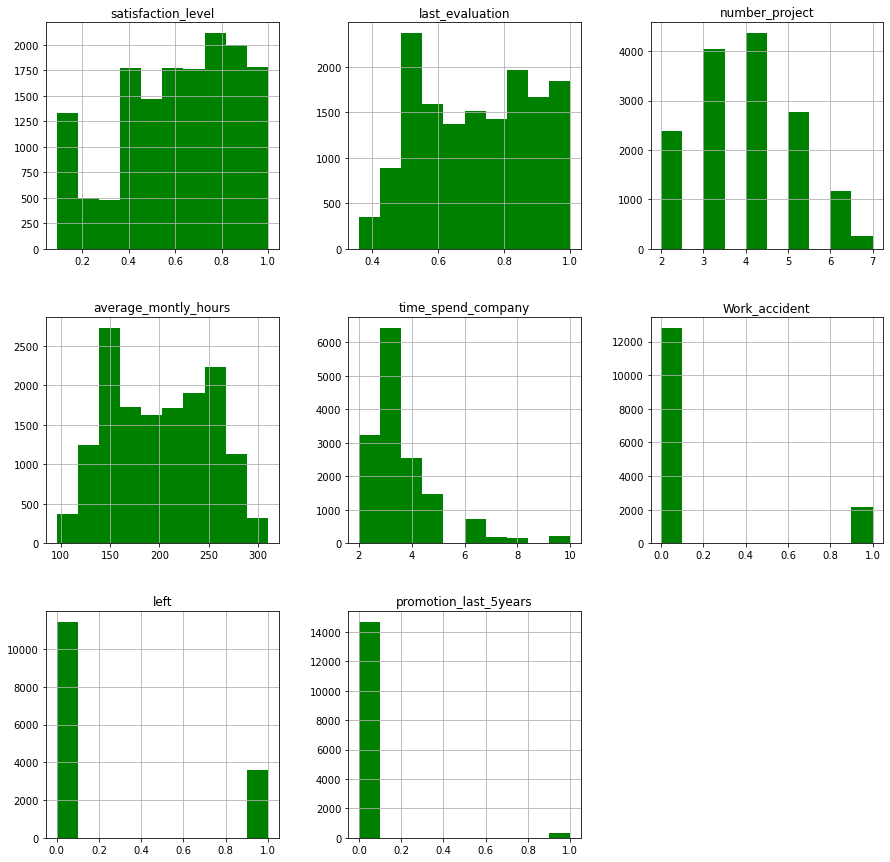

In [84]:
hr.hist(figsize = (15,15), color= 'green')
plt.tight_layout

In [85]:
hr['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [86]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [87]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


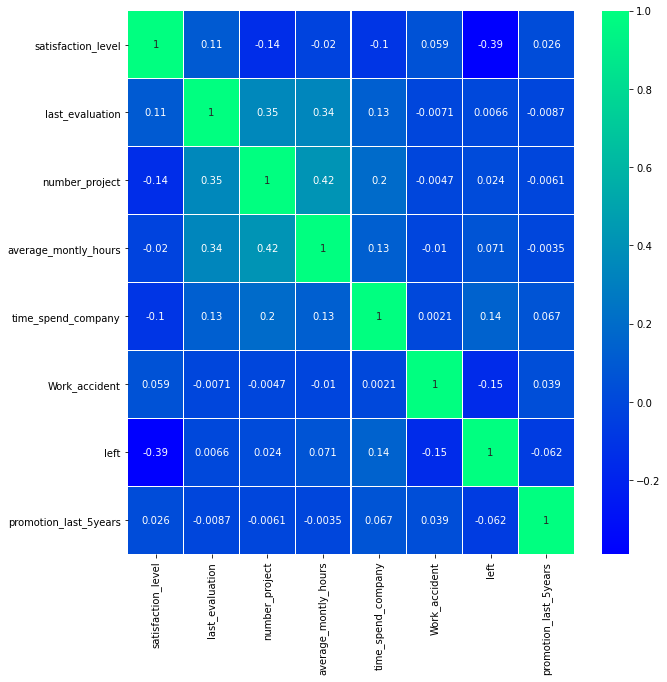

In [88]:
hrcorr = hr.corr()
fig,ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(hrcorr,annot = True, cmap = 'winter',lw=0.2 )

In [89]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [90]:
hr_dummies = pd.get_dummies(hr['Department'])
hr_dummies

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [91]:
hr_merge = pd.concat([hr,hr_dummies], axis = 1)
hr_merge

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0


In [92]:
hr_merge['salary'] = le.fit_transform(hr_merge['salary'])
hr_merge.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0


In [93]:
hr_merge.drop(['Department','technical'], axis = 1, inplace = True)

In [94]:
hr_merge.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0


In [95]:
hr_merge = hr_merge.sample(frac=0.3,replace = True)

In [96]:
hr_merge.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
6124,0.52,0.62,3,179,3,0,0,0,0,0,0,0,0,0,0,0,1,0
13892,0.93,0.98,4,189,10,0,0,0,2,0,0,0,0,0,0,0,1,0
2072,0.97,0.83,4,202,3,0,0,0,1,0,0,0,0,0,0,0,1,0
11811,0.83,0.60,4,161,2,0,0,0,0,0,0,0,0,1,0,0,0,0
12448,0.36,0.48,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [97]:
X = hr_merge.drop('left', axis = 1)
y = hr_merge['left']

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [100]:
log_reg = LogisticRegression()

In [101]:
log_reg.fit(X_train, y_train)

/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
log_reg.score(X_train, y_train)

0.7794444444444445

In [103]:
y_preds = log_reg.predict(X_test)

In [104]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [105]:
cl_report = print(classification_report(y_test,y_preds))
cl_report

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       680
           1       0.53      0.22      0.31       220

    accuracy                           0.76       900
   macro avg       0.66      0.58      0.59       900
weighted avg       0.73      0.76      0.72       900



In [106]:
cf_matrix= print(confusion_matrix(y_test,y_preds))
cf_matrix

[[637  43]
 [171  49]]


[Text(0.5, 24.0, 'Predicted Label'), Text(42.0, 0.5, 'True Label')]

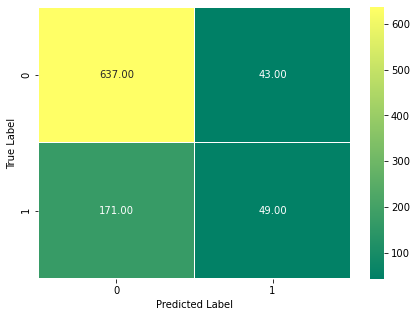

In [107]:
fig,ax = plt.subplots(figsize = (7,5))
ax = sns.heatmap(confusion_matrix(y_test,y_preds), annot = True, cmap = 'summer', fmt = '.2f', lw = 0.2)
ax.set(xlabel = 'Predicted Label', ylabel = 'True Label')

In [108]:
print(accuracy_score(y_test,y_preds))

0.7622222222222222


# 8. Logistic Regression (Multiclass Classification)

In [109]:
from sklearn.datasets import load_digits

In [110]:
digits = load_digits()

In [111]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [112]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [113]:
digits.feature_names[0]

'pixel_0_0'

<Figure size 432x288 with 0 Axes>

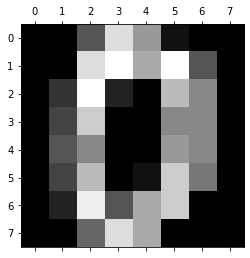

In [114]:
plt.gray()
plt.matshow(digits.images[0])

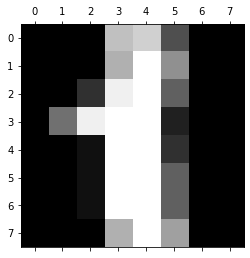

In [115]:
plt.matshow(digits.images[1])

<Figure size 432x288 with 0 Axes>

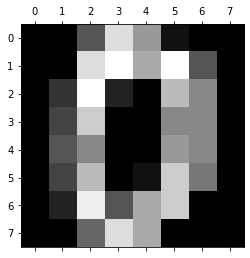

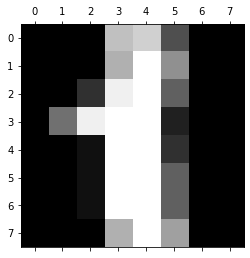

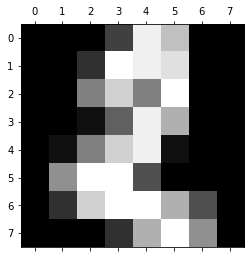

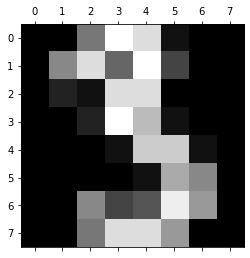

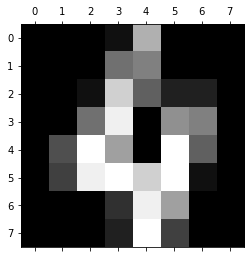

In [116]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [117]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [118]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
X_train,X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [120]:
log_reg.fit(X_train,y_train)

/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [121]:
log_reg.score(X_train, y_train)

1.0

In [122]:
y_preds = log_reg.predict(X_test)

In [123]:
y_preds

array([6, 9, 0, 8, 2, 4, 3, 2, 3, 4, 2, 3, 2, 1, 8, 4, 9, 5, 7, 7, 6, 4,
       0, 9, 1, 2, 2, 5, 6, 4, 2, 7, 7, 0, 2, 0, 0, 8, 1, 8, 6, 3, 0, 5,
       1, 3, 0, 7, 0, 5, 5, 7, 6, 4, 2, 8, 6, 3, 2, 5, 5, 6, 5, 4, 7, 3,
       7, 9, 8, 0, 0, 2, 6, 6, 6, 2, 6, 3, 1, 7, 5, 6, 0, 4, 4, 0, 3, 4,
       3, 1, 1, 2, 1, 5, 2, 0, 6, 0, 7, 8, 4, 6, 4, 7, 3, 0, 3, 1, 4, 0,
       3, 2, 6, 4, 1, 1, 2, 6, 5, 9, 6, 4, 6, 3, 0, 0, 9, 8, 2, 9, 0, 1,
       8, 1, 4, 6, 8, 1, 5, 5, 6, 2, 6, 7, 9, 4, 0, 1, 1, 8, 7, 5, 4, 7,
       0, 3, 7, 8, 4, 4, 5, 2, 4, 4, 7, 3, 8, 8, 8, 5, 4, 8, 7, 2, 0, 0,
       5, 8, 9, 1, 7, 8, 1, 6, 3, 0, 2, 8, 0, 8, 9, 9, 7, 5, 0, 3, 7, 7,
       4, 8, 9, 5, 9, 4, 5, 8, 4, 9, 7, 0, 5, 1, 9, 7, 1, 7, 8, 1, 2, 9,
       3, 6, 7, 5, 3, 1, 7, 7, 6, 0, 2, 9, 4, 5, 3, 7, 0, 8, 4, 1, 5, 6,
       2, 8, 3, 3, 3, 1, 9, 9, 8, 6, 8, 0, 1, 1, 5, 1, 0, 3, 1, 2, 5, 9,
       0, 1, 5, 6, 4, 0, 9, 2, 1, 8, 9, 3, 0, 9, 6, 3, 0, 2, 1, 6, 1, 8,
       2, 1, 0, 1, 9, 7, 1, 3, 6, 3, 9, 5, 0, 0, 8,

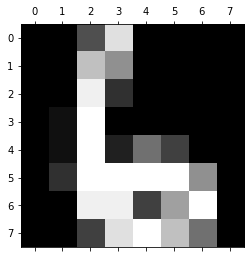

In [124]:
plt.matshow(digits.images[67])

In [125]:
digits.target[67]

6

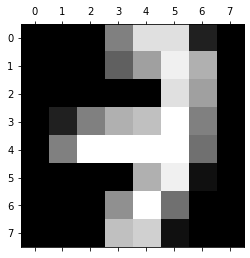

In [126]:
plt.matshow(digits.images[27])

In [127]:
digits.target[27]

7

In [128]:
log_reg.predict([digits.data[67]])

array([6])

In [129]:
print(accuracy_score(y_test,y_preds))

0.9694444444444444


In [130]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 36,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0, 29,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 32]])

Text(69.0, 0.5, 'Truth')

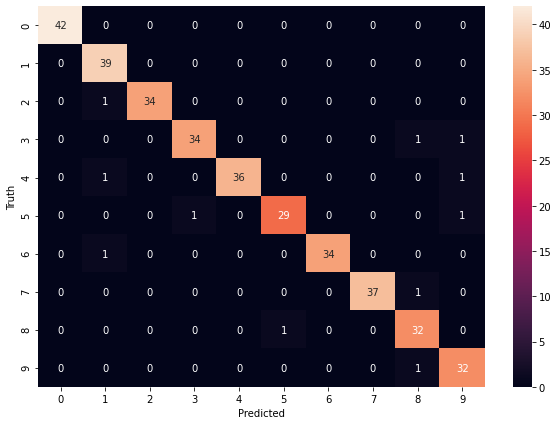

In [131]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 9. Decision Tree

In [132]:
dfs = pd.read_csv('salaries.csv')
dfs.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [133]:
dfs['degree'].value_counts()

masters      8
bachelors    8
Name: degree, dtype: int64

In [134]:
dfs.shape

(16, 4)

In [135]:
dfs.describe()

,salary_more_then_100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


In [136]:
dfs.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [138]:
# New columns formed after LabelEncoding 
dfs['company']=le.fit_transform(dfs['company'])
dfs['job']=le.fit_transform(dfs['job'])
dfs['degree']=le.fit_transform(dfs['degree'])

In [139]:
dfs.head(20)

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [140]:
X = dfs.drop('salary_more_then_100k', axis = 1)
y = dfs['salary_more_then_100k']

In [141]:
X

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [142]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
dtc = DecisionTreeClassifier()

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [146]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [147]:
dtc.score(X_train, y_train)

1.0

In [148]:
y_preds = dtc.predict(X_test)

In [149]:
y_preds

array([0, 0, 1, 0])

In [150]:
dtc.predict([[2,1,1]])

array([1])

In [151]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [152]:
print(confusion_matrix(y_test, y_preds))

[[1 0]
 [2 1]]


[Text(0.5, 24.0, 'Predicted Label'), Text(24.0, 0.5, 'True Label')]

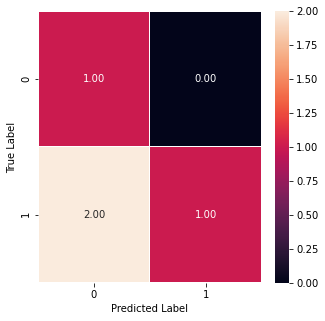

In [153]:
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, y_preds), annot =True, fmt='.2f', lw=0.2)
ax.set(xlabel ='Predicted Label', ylabel = 'True Label')

In [154]:
print(accuracy_score(y_test, y_preds))

0.5


# 10. Support Vector Machine

In [155]:
iris = pd.read_csv("Iris.csv", names = ['sepal_len', 'sepal_wid', 'petal_len', "petal_wid", 'class'] )

In [156]:
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [157]:
iris['class']=le.fit_transform(iris['class'])
iris.tail(20)

,sepal_len,sepal_wid,petal_len,petal_wid,class
130,7.4,2.8,6.1,1.9,2
131,7.9,3.8,6.4,2.0,2
132,6.4,2.8,5.6,2.2,2
133,6.3,2.8,5.1,1.5,2
134,6.1,2.6,5.6,1.4,2
135,7.7,3.0,6.1,2.3,2
136,6.3,3.4,5.6,2.4,2
137,6.4,3.1,5.5,1.8,2
138,6.0,3.0,4.8,1.8,2
139,6.9,3.1,5.4,2.1,2


In [158]:
iris0=iris[iris['class']==0]
iris1=iris[iris['class']==1]
iris2=iris[iris['class']==2]

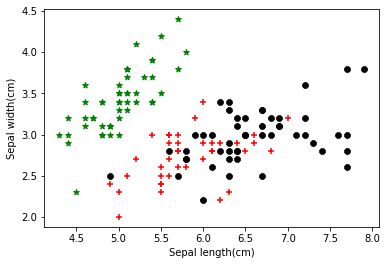

In [159]:
# Plotting sepal length and sepal width
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
plt.scatter(iris0['sepal_len'], iris0['sepal_wid'], color = 'green', marker= '*')
plt.scatter(iris1['sepal_len'], iris1['sepal_wid'], color = 'red', marker= '+')
plt.scatter(iris2['sepal_len'], iris2['sepal_wid'], color = 'black', marker= '8');

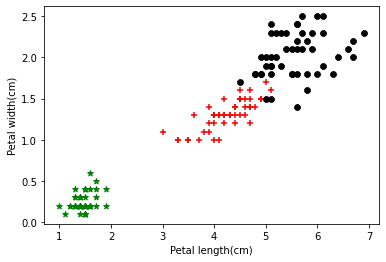

In [160]:
# Plotting petal length and petal width
plt.xlabel('Petal length(cm)')
plt.ylabel('Petal width(cm)')
plt.scatter(iris0['petal_len'], iris0['petal_wid'], color = 'green', marker= '*')
plt.scatter(iris1['petal_len'], iris1['petal_wid'], color = 'red', marker= '+')
plt.scatter(iris2['petal_len'], iris2['petal_wid'], color = 'black', marker= '8');

In [161]:
# iris['flower_class']= iris['class'].apply(lambda x:iris.class[x]) 

In [162]:
iris['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [163]:
X = iris.drop('class', axis = 1)
y = iris['class']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [165]:
from sklearn.svm import SVC

In [166]:
svc = SVC()

In [167]:
svc.fit(X_train, y_train)

SVC()

In [168]:
svc.score(X_train, y_train)

0.975

In [169]:
y_preds = svc.predict(X_test)

In [170]:
y_preds

array([2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 0, 1, 0, 1])

In [171]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [172]:
print(confusion_matrix(y_test, y_preds))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]


[Text(0.5, 33.0, 'Predicted Label'), Text(69.0, 0.5, 'True Label')]

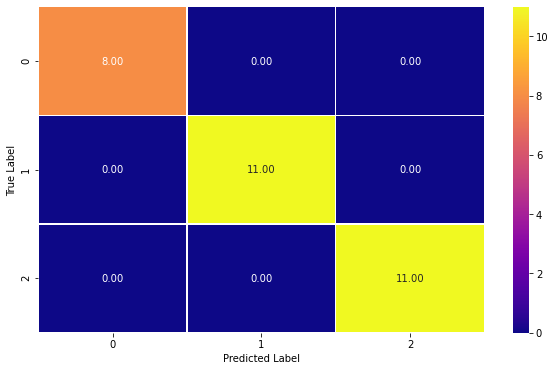

In [173]:
fig,ax = plt.subplots(figsize= (10,6))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt = '.2f', lw=0.2, cmap ='plasma')
ax.set(xlabel= 'Predicted Label', ylabel= 'True Label')

## SVM- Exercise 

In [174]:
from sklearn.datasets import load_digits
digits = load_digits()

In [175]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [176]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [177]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [178]:
df = pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [179]:
df['target']=digits.target
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [180]:
pd.set_option('display.max_columns', len(df.columns))

In [181]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [182]:
X = df.drop('target', axis = 1)
y = df['target']

In [183]:
from sklearn.svm import SVC
rbf_model = SVC(kernel = 'rbf')

In [184]:
rbf_model.fit(X_train, y_train)

SVC()

In [185]:
rbf_model.score(X_train, y_train)

0.975

In [186]:
y_preds = rbf_model.predict(X_test)

In [187]:
print(accuracy_score(y_test, y_preds))

1.0


In [188]:
svc_linear = SVC(kernel = 'linear')

In [189]:
svc_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [190]:
svc_linear.score(X_train,y_train)

0.9916666666666667

In [191]:
y_preds = svc_linear.predict(X_test)

In [192]:
print(confusion_matrix(y_test, y_preds))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]


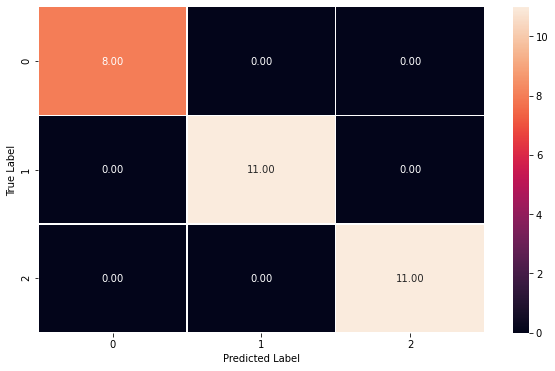

In [193]:
fig,ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),annot=True, fmt = '.2f',lw = 0.2)
ax.set(xlabel='Predicted Label', ylabel = 'True Label');

In [194]:
print(accuracy_score(y_test, y_preds))

1.0


# 11. Random Forest Classifier

In [195]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

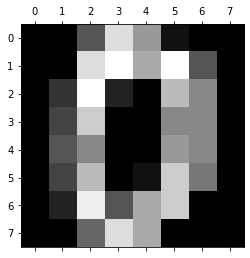

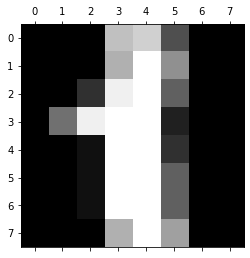

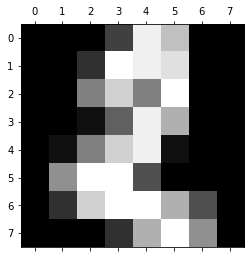

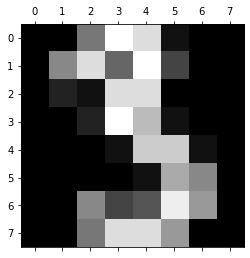

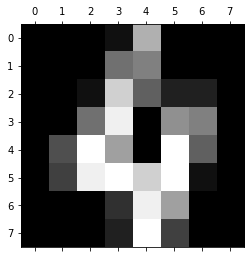

In [196]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [197]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [198]:
ddf = pd.DataFrame(digits.data)
ddf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [199]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [200]:
ddf['target'] = digits.target
ddf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [201]:
X = ddf.drop('target', axis = 1)
y=ddf['target']

In [202]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [203]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [204]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [205]:
rfc.score(X_train,y_train)

1.0

In [206]:
y_preds = rfc.predict(X_test)
y_preds

array([8, 5, 8, 7, 3, 7, 0, 5, 0, 5, 6, 3, 6, 7, 3, 7, 9, 5, 4, 6, 7, 5,
       3, 1, 2, 5, 9, 2, 4, 3, 0, 6, 7, 7, 3, 3, 9, 4, 4, 8, 2, 2, 6, 5,
       9, 3, 5, 2, 9, 2, 7, 9, 7, 3, 1, 1, 5, 2, 7, 0, 1, 3, 2, 1, 0, 5,
       1, 0, 7, 0, 9, 7, 8, 1, 8, 0, 7, 9, 3, 5, 0, 7, 3, 4, 7, 1, 0, 2,
       0, 1, 7, 5, 4, 8, 1, 5, 2, 1, 8, 8, 4, 2, 0, 9, 5, 6, 2, 4, 0, 1,
       3, 1, 2, 1, 1, 8, 1, 9, 2, 9, 8, 4, 5, 5, 5, 0, 2, 9, 6, 7, 3, 6,
       7, 2, 5, 8, 3, 4, 8, 8, 6, 7, 0, 6, 9, 4, 2, 1, 2, 6, 5, 7, 0, 6,
       7, 9, 5, 9, 2, 2, 0, 3, 7, 9, 6, 5, 2, 9, 6, 3, 0, 9, 7, 9, 7, 3,
       9, 8, 0, 8, 1, 1, 2, 3, 8, 9, 6, 6, 6, 3, 2, 9, 5, 8, 5, 1, 5, 5,
       8, 7, 7, 2, 6, 7, 0, 8, 1, 6, 3, 3, 0, 1, 0, 3, 7, 0, 0, 7, 7, 4,
       0, 8, 8, 8, 5, 5, 4, 7, 4, 3, 4, 1, 6, 1, 6, 2, 7, 2, 9, 2, 0, 3,
       8, 8, 1, 3, 9, 0, 5, 6, 4, 7, 2, 9, 0, 7, 7, 0, 2, 3, 1, 4, 5, 1,
       7, 0, 3, 0, 0, 6, 5, 3, 6, 2, 2, 6, 2, 9, 6, 6, 1, 6, 2, 7, 9, 4,
       8, 7, 8, 4, 3, 5, 2, 4, 5, 8, 8, 6, 0, 5, 6,

In [207]:
cm = print(confusion_matrix(y_test,y_preds))

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  1  0  0  1  0]
 [ 0  0  0  0 24  0  0  0  0  1]
 [ 0  0  0  0  0 31  0  0  0  0]
 [ 0  0  0  0  1  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  1  1  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  2  0  0  1 32]]


[Text(0.5, 69.0, 'Predicted Value'), Text(69.0, 0.5, 'True value')]

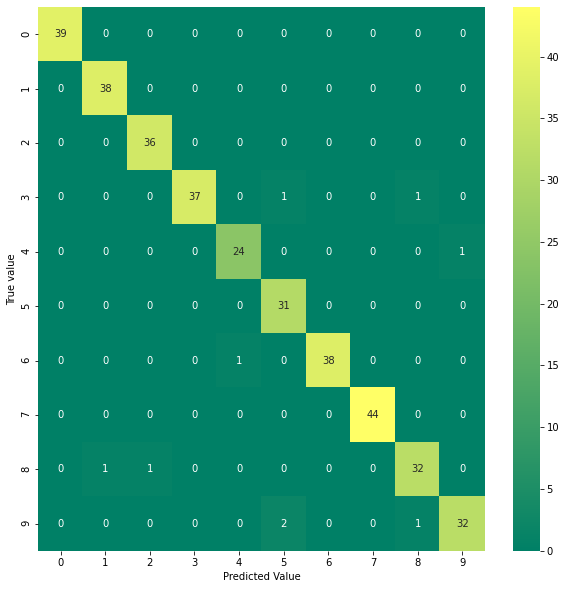

In [208]:
fig,ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot = True, cmap='summer')
ax.set(xlabel='Predicted Value', ylabel = 'True value')

# 12. K Fold Cross Validation(cross_val_score)

In [209]:
ddf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [210]:
X = ddf.drop('target', axis = 1)
y = ddf['target']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [212]:
log_reg.fit(X_train,y_train)

/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [213]:
log_reg.score(X_train,y_train)

1.0

In [214]:
y_preds = log_reg.predict(X_test)
y_preds

array([0, 4, 8, 0, 6, 6, 7, 4, 8, 8, 0, 7, 3, 7, 9, 1, 8, 5, 1, 1, 5, 7,
       4, 3, 0, 5, 6, 0, 5, 2, 7, 7, 0, 6, 3, 2, 9, 4, 0, 7, 4, 0, 0, 7,
       9, 3, 9, 1, 8, 8, 0, 1, 6, 8, 4, 9, 5, 0, 6, 0, 6, 5, 6, 8, 8, 9,
       6, 4, 4, 7, 4, 5, 5, 0, 5, 3, 1, 0, 2, 5, 4, 6, 3, 8, 5, 0, 0, 7,
       6, 0, 2, 8, 6, 6, 5, 4, 2, 3, 0, 5, 9, 7, 3, 7, 4, 2, 6, 6, 9, 6,
       8, 1, 0, 7, 1, 8, 7, 7, 1, 9, 5, 7, 1, 9, 3, 1, 4, 2, 0, 9, 1, 9,
       5, 7, 4, 2, 1, 4, 6, 9, 0, 7, 0, 9, 7, 0, 5, 9, 5, 2, 6, 8, 5, 9,
       3, 8, 9, 7, 1, 5, 8, 7, 2, 4, 1, 9, 7, 3, 6, 9, 9, 3, 4, 0, 1, 1,
       8, 0, 7, 2, 7, 6, 7, 4, 1, 5, 9, 1, 2, 5, 8, 1, 5, 6, 6, 9, 9, 2,
       0, 5, 4, 7, 2, 6, 0, 1, 4, 1, 9, 8, 8, 2, 4, 6, 0, 0, 0, 8, 1, 6,
       2, 9, 6, 0, 3, 0, 9, 0, 3, 7, 6, 8, 5, 5, 3, 0, 6, 7, 2, 1, 4, 4,
       5, 9, 3, 6, 6, 9, 2, 2, 2, 6, 8, 9, 0, 4, 9, 5, 1, 7, 9, 0, 8, 2,
       8, 4, 9, 2, 9, 2, 2, 9, 2, 6, 8, 8, 6, 2, 6, 4, 2, 5, 7, 0, 0, 6,
       9, 8, 2, 3, 5, 5, 8, 9, 3, 8, 0, 1, 9, 1, 9,

In [215]:
print(accuracy_score(y_test,y_preds))

0.9555555555555556


In [216]:
svc.fit(X_train,y_train)

SVC()

In [217]:
svc.score(X_train, y_train)

0.9965205288796103

In [218]:
y_preds= svc.predict(X_test)

In [219]:
print(accuracy_score(y_test,y_preds))

0.9861111111111112


In [220]:
from sklearn.model_selection import cross_val_score

In [221]:
cv_score = cross_val_score(log_reg,X,y, cv = 10)
cv_score.mean()

/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

0.928193668528864

In [222]:
cv_svc_score = cross_val_score(svc,X,y, cv = 10)
cv_svc_score.mean()

0.9699503414028554

In [223]:
cv_rfc_score = cross_val_score(rfc,X,y, cv = 10)
cv_rfc_score.mean()

0.945990068280571

# 13. K Means Clustering

In [224]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [225]:
income = pd.read_csv('income.csv')
income.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


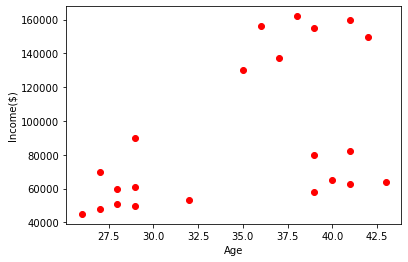

In [226]:
plt.scatter(income['Age'],income['Income($)'], color = 'red')
plt.xlabel('Age')
plt.ylabel('Income($)');

In [227]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [228]:
y_preds = km.fit_predict(income[['Age', 'Income($)']])
y_preds

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [229]:
income['cluster']=y_preds
income.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No handles with labels found to put in legend.


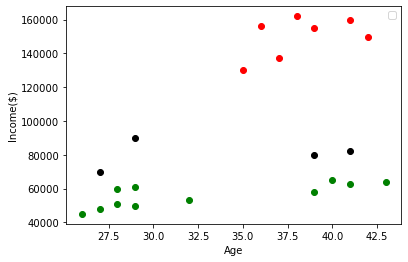

In [230]:
income1 =income[income.cluster==0]
income2 =income[income.cluster==1]
income3 =income[income.cluster==2]

plt.scatter(income1.Age, income1['Income($)'], color='green')
plt.scatter(income2.Age, income2['Income($)'], color='red')
plt.scatter(income3.Age, income3['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [231]:
scaler = MinMaxScaler()
scaler.fit(income[['Income($)']])
income['Income($)']=scaler.transform(income[['Income($)']])
income.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [232]:
scaler.fit(income[['Age']])
income['Age'] = scaler.transform(income[['Age']])
income.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [233]:
km = KMeans(n_clusters=3)
y_preds = km.fit_predict(income[['Age', 'Income($)']])
y_preds

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [234]:
income['cluster']=y_preds
income

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


No handles with labels found to put in legend.


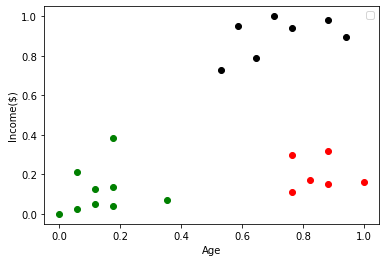

In [235]:
income1 =income[income.cluster==0]
income2 =income[income.cluster==1]
income3 =income[income.cluster==2]

plt.scatter(income1.Age, income1['Income($)'], color='green')
plt.scatter(income2.Age, income2['Income($)'], color='red')
plt.scatter(income3.Age, income3['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [236]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

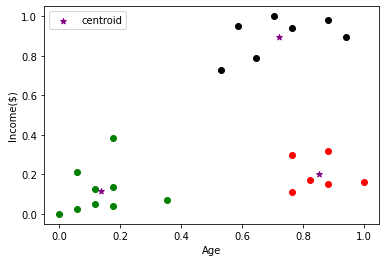

In [237]:
income1 =income[income.cluster==0]
income2 =income[income.cluster==1]
income3 =income[income.cluster==2]

plt.scatter(income1.Age, income1['Income($)'], color='green')
plt.scatter(income2.Age, income2['Income($)'], color='red')
plt.scatter(income3.Age, income3['Income($)'], color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker = '*', label = 'centroid' )

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [238]:
k_range = range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters = k)
    km.fit(income[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [239]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.27768187154369994,
 0.21055478995472496,
 0.1685851223602976,
 0.13781880133764024,
 0.10188787724979426]

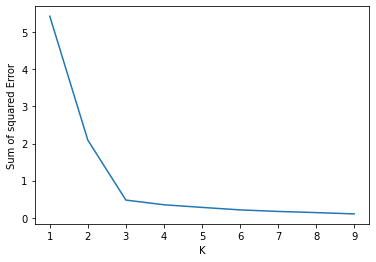

In [240]:
plt.xlabel('K')
plt.ylabel('Sum of squared Error')
plt.plot(k_range,sse)

# 14. Naive Bayes Classifier

In [244]:
titanic=pd.read_csv('titanic_train.csv')

In [245]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [250]:
titanic.shape

(891, 5)

In [247]:
titanic.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'],axis=1, inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [248]:
X = titanic.drop('Survived', axis = 1)
y= titanic['Survived']

In [249]:
dummies = pd.get_dummies(titanic['Sex'])
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [254]:
titanic_merge = pd.concat([titanic, dummies], axis=1)
titanic_merge

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,1
887,1,1,female,19.0,30.0000,1,0
888,0,3,female,NaN,23.4500,1,0
889,1,1,male,26.0,30.0000,0,1


In [256]:
titanic_merge.drop(['Sex','female'], axis=1, inplace=True)

In [258]:
titanic_merge.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [260]:
X = titanic_merge.drop('Survived', axis = 1)
y = titanic_merge['Survived']

In [261]:
titanic_merge.isna().sum()

Survived      0
Pclass        0
Age         177
Fare          0
male          0
dtype: int64

In [266]:
age_median= titanic_merge['Age'].median()
age_median

28.0

In [267]:
titanic_merge['Age'].fillna(age_median, inplace=True)

In [268]:
titanic_merge.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [269]:
titanic_merge.isna().sum()

Survived    0
Pclass      0
Age         0
Fare        0
male        0
dtype: int64

In [271]:
X= titanic_merge.drop('Survived', axis=1)
y = titanic['Survived']

In [272]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [273]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [274]:
gnb.fit(X_train,y_train)

GaussianNB()

In [275]:
gnb.score(X_train,y_train)

0.7710674157303371

In [277]:
y_preds=gnb.predict(X_test)

In [278]:
y_preds

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0])

In [279]:
print(accuracy_score(y_test,y_preds))

0.7988826815642458


# 16. Hypertuning

In [293]:
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
